<a href="https://colab.research.google.com/github/Laofin050/Machine-Learning-Project-2018-049-2018-050/blob/main/Tugas6_Save_svg_%26_h5_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TUGAS 6 - ML - MATERI: Save .svg dan h5**

**Feny Septhalia Insyira Putri - 201810370311049**

**Laofin Arifa - 201810370311050**

**LOAD DATA**

In [3]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:45<00:00, 63.9MB/s]
100% 2.29G/2.29G [00:45<00:00, 54.6MB/s]


In [2]:
api_token = {"username":"fenysepthalia09","key":"d6f7a0d96b5b3b3e3aaa71f0afe86737"}
import json
import zipfile
import os
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
import os
import zipfile

local_zip = '/content/chest-xray-pneumonia.zip' #lokasi zip
zip_ref = zipfile.ZipFile(local_zip, 'r') # file zip
zip_ref.extractall('/content/') #ekstrak zip
zip_ref.close()

**DATA PREPROCESSING**

In [5]:
import os
import cv2 
import numpy as np

# Gather data train
train_data = []
train_label = []

train_dir=os.path.join('/content/chest_xray/train')
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)

Train Data =  (5216, 150, 150, 3)
Train Label =  (5216,)


In [6]:
test_data = []
test_label = []

# Gather data test
test_dir=os.path.join('/content/chest_xray/test')
for r, d, f in os.walk(test_dir):
    for file in f:
        if ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            test_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            test_label.append(label)

test_data = np.array(test_data)
test_label = np.array(test_label)

print("Test Data = ", test_data.shape)
print("Test Label = ", test_label.shape)

Test Data =  (624, 150, 150, 3)
Test Label =  (624,)


In [7]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])
x_train = train_data.astype('float32') / 255.0
x_test = test_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [52 52 52]
Data setelah di-normalisasi  [0.20392157 0.20392157 0.20392157]


In [8]:
from sklearn.preprocessing import LabelEncoder
print("Label sebelum di-encoder ", train_label[995:1005])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_test = lb.fit_transform(test_label)

print("Label setelah di-encoder ", y_train[995:1005])

Label sebelum di-encoder  ['NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL'
 'NORMAL' 'NORMAL']
Label setelah di-encoder  [0 0 0 0 0 0 0 0 0 0]


**MODELLING**

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten

In [10]:
model = Sequential()

model.add(InputLayer(input_shape=[150,150,3]))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Flatten())

In [11]:
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [12]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 38, 38, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 19, 19, 64)       0

In [13]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [14]:
H = model.fit(x_train, y_train, batch_size=20, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
261/261 [==============================] - 37s 24ms/step - loss: 0.1948 - acc: 0.9227 - val_loss: 0.6132 - val_acc: 0.7821
Epoch 2/15
261/261 [==============================] - 6s 22ms/step - loss: 0.0899 - acc: 0.9678 - val_loss: 0.5406 - val_acc: 0.8301
Epoch 3/15
261/261 [==============================] - 6s 22ms/step - loss: 0.0691 - acc: 0.9780 - val_loss: 0.9485 - val_acc: 0.7644
Epoch 4/15
261/261 [==============================] - 6s 22ms/step - loss: 0.0510 - acc: 0.9839 - val_loss: 1.2906 - val_acc: 0.7484
Epoch 5/15
261/261 [==============================] - 6s 22ms/step - loss: 0.0373 - acc: 0.9873 - val_loss: 1.9301 - val_acc: 0.7115
Epoch 6/15
261/261 [==============================] - 6s 22ms/step - loss: 0.0357 - acc: 0.9873 - val_loss: 1.8682 - val_acc: 0.7356
Epoch 7/15
261/261 [==============================] - 6s 22ms/step - loss: 0.0191 - acc: 0.9921 - val_loss: 1.9854 - val_acc: 0.7772
Epoch 8/15
261/261 [==============================] - 6s 22ms/step -

**SAVE MODEL**

In [15]:
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


**EVALUASI MODEL**

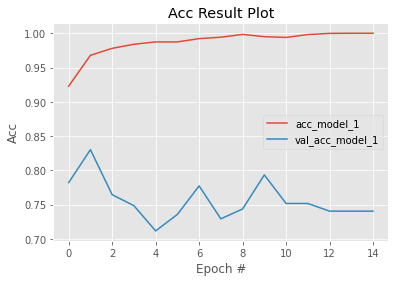

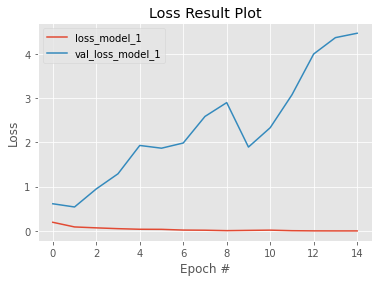

<Figure size 432x288 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), H.history["acc"], label="acc_model_1")
plt.plot(np.arange(0, 15), H.history["val_acc"], label="val_acc_model_1")
plt.title("Acc Result Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

plt.plot(np.arange(0, 15), H.history["loss"], label="loss_model_1")
plt.plot(np.arange(0, 15), H.history["val_loss"], label="val_loss_model_1")
plt.title("Loss Result Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

# SAVE ACCURACY DAN LOSS
plt.savefig("Accuracy Plot.svg", format="svg", dpi=1200)
plt.savefig("Loss Plot.svg", format="svg", dpi=1200)

In [17]:
# Hasil pengerjaan point 4.2
from sklearn.metrics import classification_report

pred = model.predict(x_test)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_test, labels))

              precision    recall  f1-score   support

           0       0.97      0.32      0.48       234
           1       0.71      0.99      0.83       390

    accuracy                           0.74       624
   macro avg       0.84      0.66      0.65       624
weighted avg       0.81      0.74      0.70       624

